**APRENDIZAJE NO SUPERVISADO**

En el aprendizaje no supervisado normalmente se suele trabajar con datasets no etiquetados (no tenemos target).

El objetivo principal es estudiar la estructura intrínseca (y comúnmente oculta) de los datos

# **Clustering**

En el clustering partimos de un conjunto de datos sin target, por lo tanto el objetivo que queremos conseguir aplicando esta metodología es dividir estos datos en x grupos, que deberán tener alguna característica en común.

Hay varios tipos de clustering:
1. Partitioning clustering
2. Hierarchical clustering
*Avanzados*
3. DBSCAN: Density-based clustering

(no se tratarán en este curso)
4. Hybrid clustering methods
5. Fuzzy clustering


#Partitioning clustering

## K-means

En este algoritmo buscamos un número predeterminado de clusters, definido por nosotros. Tiene en cuenta dos condiciones principales:
1.  El centroide del clúster es siempre la media del los puntos que lo conforman.
2.  Un punto que forme parte de un clúster siempre estará más cerca de los puntos que conforman su própio clúster que de aquellos que forman parte de otro.

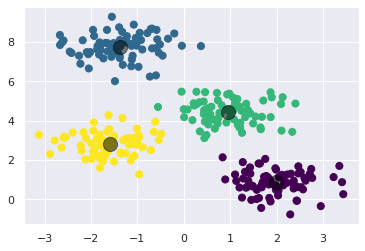

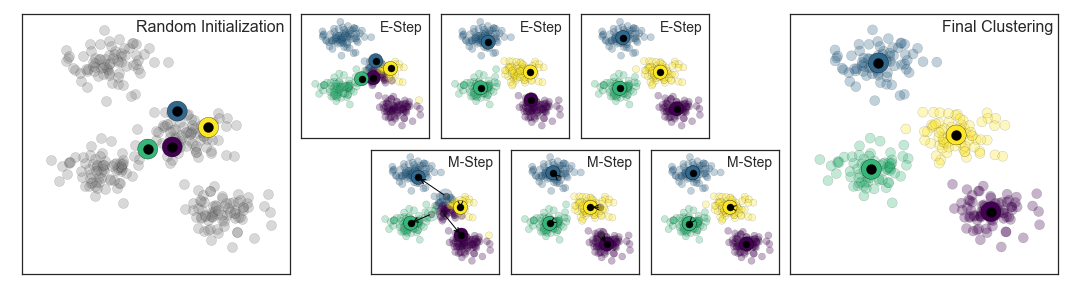

El proceso que sigue este algoritmo es el siguiente:
1. Escoger de manera aleatoria la posición de los centroides de los clústers
2. Asignar labels a cada uno de los puntos de nuestro dataset, en base al centro que tengamos más cercano.
3. Calcular los nuevos centroides.
4. Iterar (2-3-4) hasta tener una convergencia.

Uno de los problemas que se puede presentar; como se ha planteado anteriormente, es que a pesar de **obtener una convergencia puede que no tengamos los centroides óptimos**. ¿Cuáles pueden ser las causas? Básicamente el hecho que, como se ha mencionado en el primer paso, los centroides se asignan de manera aleatória, y esto puede afectar al resultado final. Por esta razón uno de los parámetros que nos ofrece la libreria de Scikit-Learn es init.

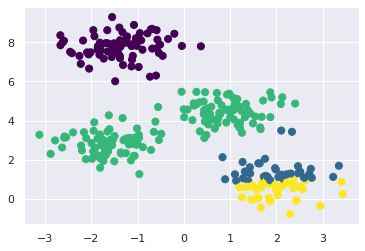

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

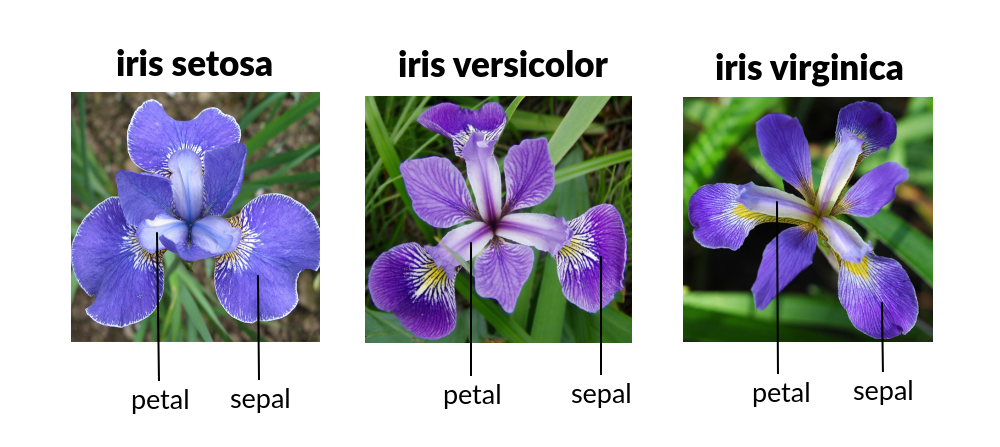

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"] = iris.target

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
df.sample(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
35                 5.0               3.2                1.2               0.2   
117                7.7               3.8                6.7               2.2   
29                 4.7               3.2                1.6               0.2   
8                  4.4               2.9                1.4               0.2   
107                7.3               2.9                6.3               1.8   
26                 5.0               3.4                1.6               0.4   
60                 5.0               2.0                3.5               1.0   
77                 6.7               3.0                5.0               1.7   
46                 5.1               3.8                1.6               0.2   
121                5.6               2.8                4.9               2.0   

     target  
35        0  
117       2  
29        0  
8         0  
107       2  
26        0  
60        1  
77        1  
46        0  
121       2

In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
X = iris.data[:, :2]  
y = iris.target

**OJO !!!** Vamos a hacer clusters sólo con 2 features para poder plotear mejor

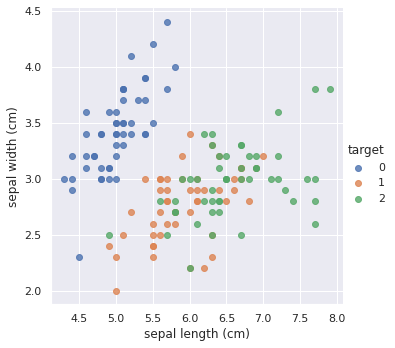

In [ ]:
import seaborn as sns
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=df, fit_reg=False, hue='target')


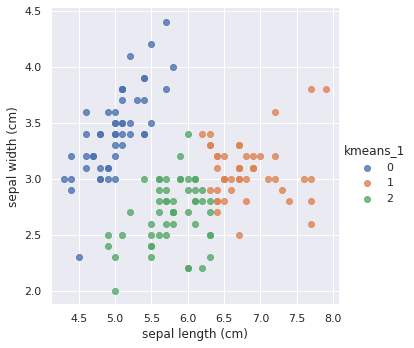

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['kmeans_1'] =  kmeans.labels_
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=df, fit_reg=False, hue='kmeans_1')

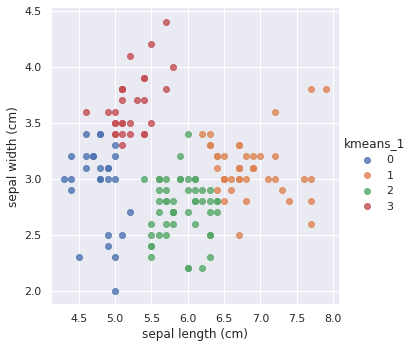

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X) # Utiliza por defecto k-means++
df['kmeans_1'] =  kmeans.labels_
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=df, fit_reg=False, hue='kmeans_1')

In [ ]:
X = iris.data 
y = iris.target

In [ ]:
# Obtención de la exactitud

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train_std)
y_cluster = kmeans.predict(X_test_std)

from scipy.stats import mode
from sklearn.metrics import accuracy_score

# Corrección del valor del target
y_pred = np.zeros_like(y_cluster)
for i in range(3):
    mask = (y_cluster == i)
    y_pred[mask] = mode(y_test[mask])[0]
accuracy_score(y_test, y_pred)


0.9

#### Problemática

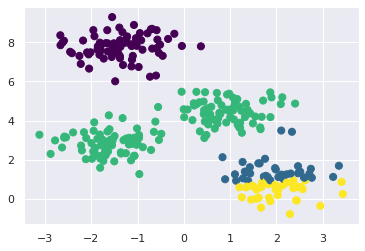

Además de la problemática, anteriormente vista, de la convergencia incorrecta debido a la aleatoriedad de los centros iniciales, se añaden otras. Una problemática que se nos puede presentar es la de la siguiente imagen:

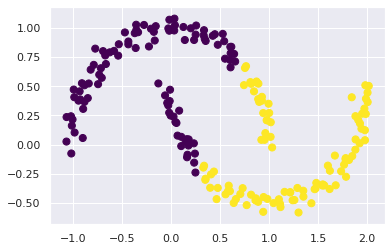

K-means agrupa los datos de la manera en que se observa debido a lo mencionado anteriormente; los grupos se definen por aquellos datos que están más cerca del centroide. Sin embargo puede observarse a simple vista que una agrupación diferente definiría mejor los datos.

Por lo tanto puede verse que K-means **no se adapta a las diferentes geometrías que puedan tener los datos**.

Otra problemática que se puede presentar, es que como se ha mencionado al inicio; **el número de clusters debe ser definido por nosotros inicialmente**.

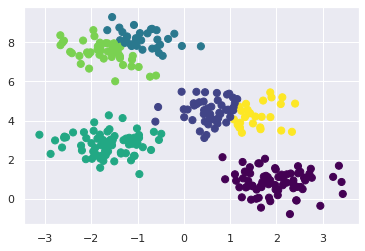

## DBSCAN

Density-based spatial clustering of applications with noise


#### DBSCAN en Iris dataset (Sólo como curiosidad. No ver)

In [ ]:
import scipy as sp
def dbscan_predict(dbscan_model, X_new, metric=sp.spatial.distance.cosine):
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1 

    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        for i, x_core in enumerate(dbscan_model.components_): 
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break

    return y_new

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train_std)

db = DBSCAN(eps=0.3, min_samples=3).fit(X_train_std)

y_pred = dbscan_predict(db, X_test_std)

from scipy.stats import mode
from sklearn.metrics import accuracy_score

# Corrección del valor del target
labels = np.zeros_like(y_pred)
for i in range(4):
    mask = (y_pred == i)
    labels[mask] = mode(y_test[mask])[0]
accuracy_score(y_test, labels)

0.9333333333333333

#### DBSCAN con clusters generados

Cuando los datos se encuentran densamente agrupados en distintas formas, resulta más adecuado usar otros modelos como DBSCAN:

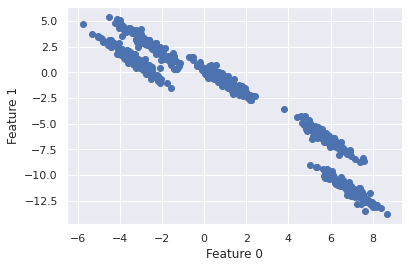

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

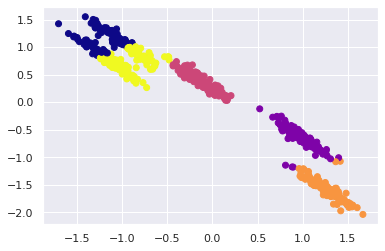

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Resultado de Kmeans con 5 clusters
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap="plasma")

Text(0, 0.5, 'Feature 1')

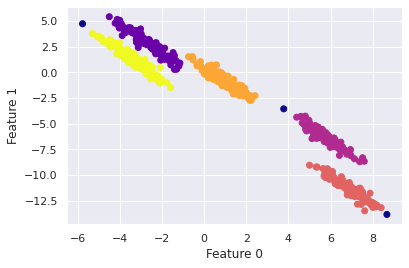

In [ ]:
# Resultado con DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2) # Modificando eps se ajusta el número de clusters
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Selección del número de clusters

Veremos 3 métodos para el análisis del número de clusters:
1. Silhouette analysis
2. Gaussian Mixture Models
3. Inertia graph

#### **1. Silhouette analysis**

Este método permite conocer cuánto de cerca están las diversas muestras de los otros clústers. Sirve para seleccionar el **número de clusters óptimo**.

El rango numérico que nos puede devolver va de -1 a +1
*   Un valor de +1 indica que las muestras se encuentran lejanas de los otros clústers
*   Un 0 indica que las muestras que pertenecen a distintos clústers están muy cercananas entre ellas
*   Un valor negativo indicaria que se ha asignado incorrectamente el valor a un clúster


https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html



¿Cómo se calcula el Silhouette score?



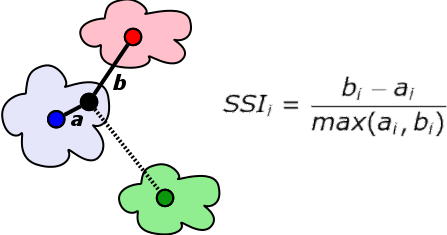

Para cada punto i, se calcula restando la distancia del punto al centroide del cluster más cercano ($b_i$) menos la distancia al centroide del propio cluster ($a_i$) dividido por la máxima de las dos distancias ($max(a_i, b_i)$)

https://www.youtube.com/watch?v=5TPldC_dC0s&list=PLmNPvQr9Tf-ZSDLwOzxpvY-HrE0yv-8Fy&t=129s

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


# En primer lugar se van a generar datos sintéticos
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=42)

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

For n_clusters = 2 The average silhouette_score is : 0.5955207405315346
For n_clusters = 3 The average silhouette_score is : 0.7613478432173022
For n_clusters = 4 The average silhouette_score is : 0.7911042588289479
For n_clusters = 5 The average silhouette_score is : 0.6645017489111895
For n_clusters = 6 The average silhouette_score is : 0.5380092827198506


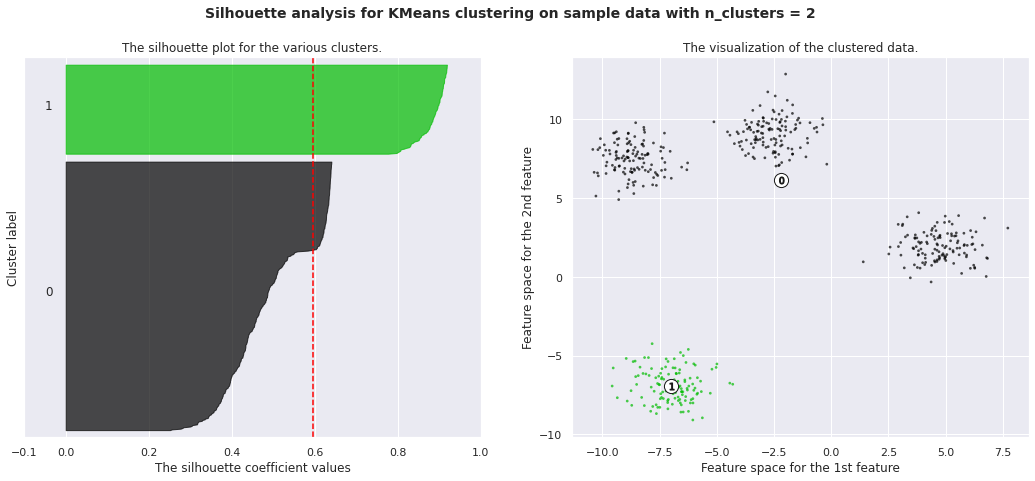

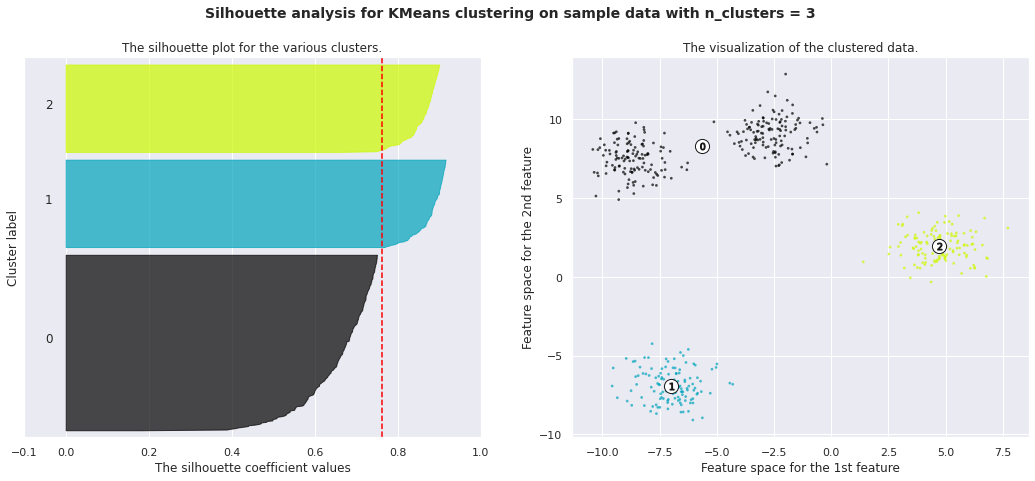

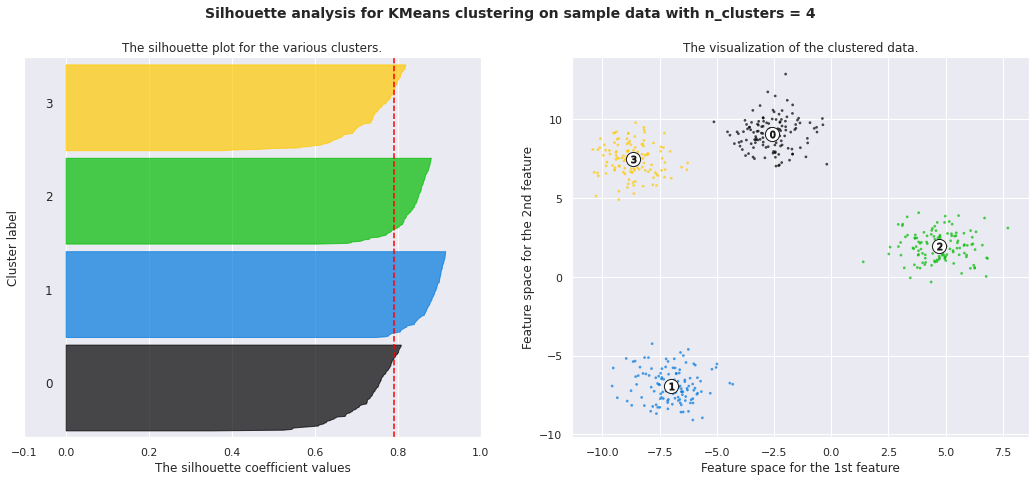

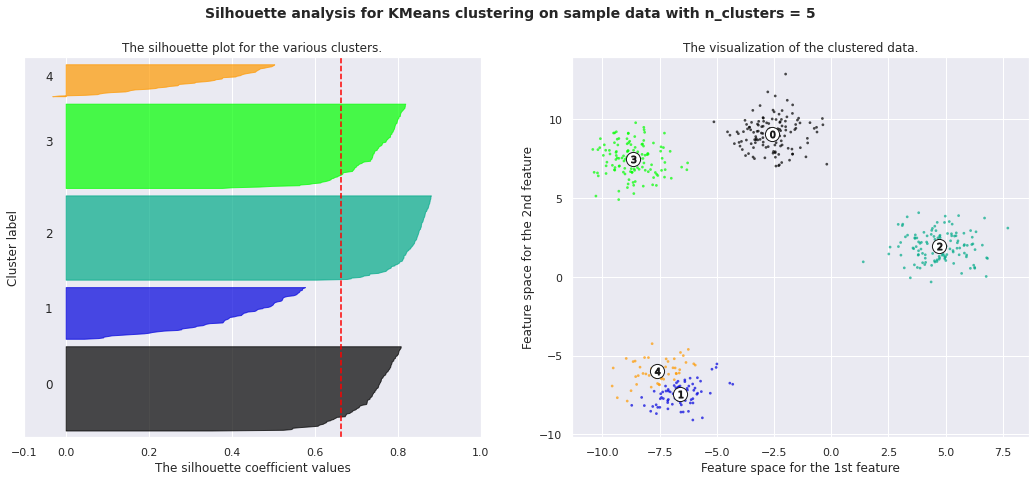

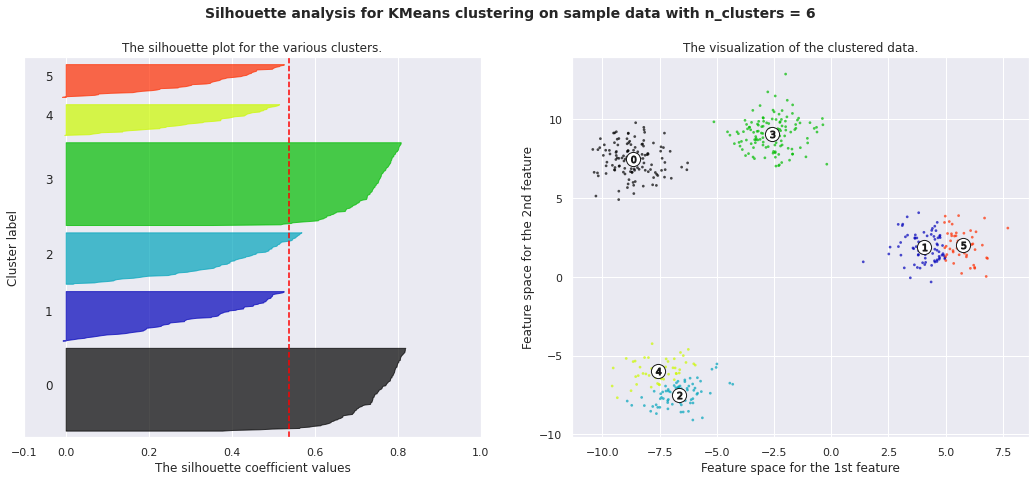

In [ ]:
# @title  Code

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

####**2. Inertia graph**

Inertia graph o método del codo

In [ ]:
# EN ESTE CASO NOS INVENTAMOS LOS DATOS
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

In [ ]:
X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

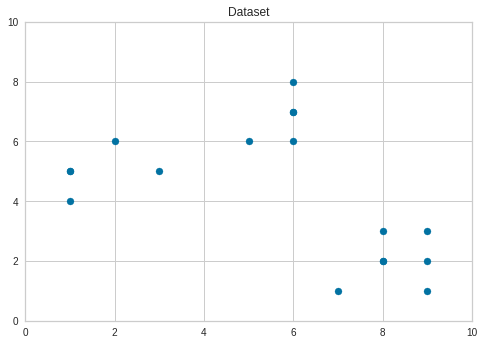

In [ ]:
# Visualizamos los datos
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

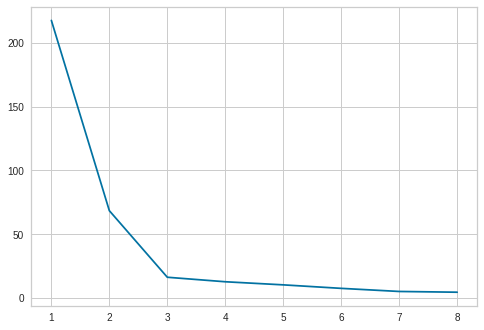

In [ ]:
from sklearn.cluster import KMeans

ks = range(1, 9)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

inertias
plt.plot(ks, inertias, 'bx-') #PONEMOS KS PARA QUE APAREZCAN TODAS LAS K sino empieza a contar en 0
# Puede observarse en el gráfico como 3 clusters sería el punto ideal ya que es cuando se reduce más.

#### Visualizando con Yellow Briks

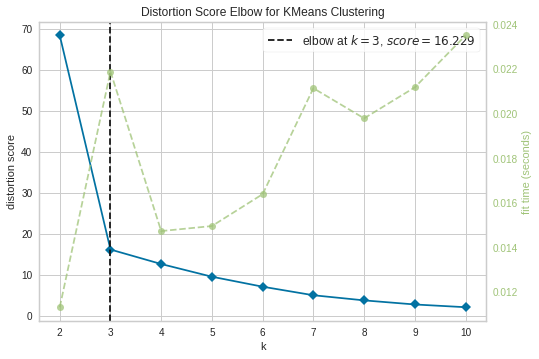

In [ ]:
# Importing KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

# Importing K-Means model
from sklearn.cluster import KMeans

# Creating the Elbow plot
visualizer = KElbowVisualizer(KMeans(), k=(2,11))

visualizer.fit(X)

# Saving plot in PNG format
visualizer.show(outpath="Elbow_Plot.png")

Visualizamos el silohuette analysis:

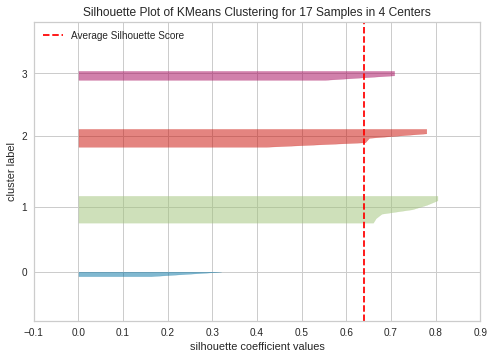

In [ ]:
# Importing SilhouetteVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Importing K-Means model
from sklearn.cluster import KMeans

# Creating the silhouette plot
visualizer = SilhouetteVisualizer(KMeans(4, random_state=42), 
                                  colors='yellowbrick')

visualizer.fit(X)

# Saving plot in PNG format
visualizer.show(outpath="Silhouette_Plot.png")

https://towardsdatascience.com/10-amazing-machine-learning-visualizations-you-should-know-in-2023-528282940582

https://www.scikit-yb.org/en/latest/index.html

## Ejemplo MNIST Dataset
1797 muestras de 8x8 = 64 características de la imagen en blanco y negro donde cada una de las muestras indica el brillo del píxel.

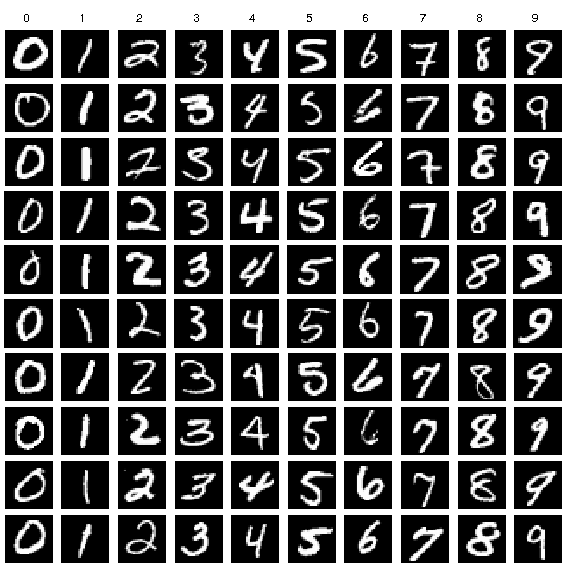

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
from sklearn.cluster import KMeans
# sabemos el número de clústers ya que sabemos las clases que tenemos
kmeans = KMeans(n_clusters = 10, random_state = 42) 
kmeans.fit(digits.data)
y_pred = kmeans.predict(digits.data)
# lo que obtenemos son 10 clústers en 64 dimensiones
kmeans.cluster_centers_.shape

(10, 64)

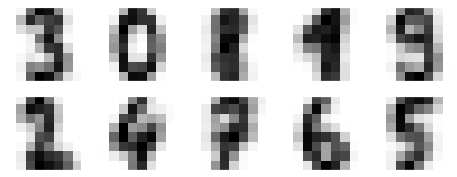

In [ ]:
# el centro del clúster es también un vector de 64 dimensiones.
# Por lo tanto si lo transformamos podemos obtener la representación visual del centro
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

# Puede verse en la representación que sin ser valores extraído de la base de datos
# pueden identificarse los números que agrupan cada clúster, el 1 y el 8 se confunden sin embargo.

In [ ]:
# Si ahora comparamos el label con los elementos del clúster vamos
# a poder observar cuanto de bien lo ha dividido (accuracy)
from scipy.stats import mode
from sklearn.metrics import accuracy_score

targets = np.zeros_like(y_pred)
for i in range(10):
    mask = (y_pred == i)
    targets[mask] = mode(digits.target[mask])[0]
accuracy_score(digits.target, targets)

0.7924318308291597

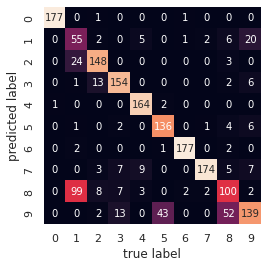

In [ ]:
from sklearn.metrics import confusion_matrix
# Con la matriz de confusión podemos ver en qué situaciones se ha equivocado más
mat = confusion_matrix(digits.target, targets)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

En resumen: lo que hemos hecho ha sido ser capaces de clasificar con un 79% de acierto los diferentes números en clases sin necesidad de haber usado sus labels. Por lo tanto sin etiquetar los datos.

*Prúebalo tú: Que pasaría si aplicáramos PCA?*

In [ ]:
#@title code
from sklearn.decomposition import PCA

# Project the data: this step will take several seconds
pca = PCA(n_components=32, random_state=42)
digits_proj = pca.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=42)
y_pred = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(y_pred)
for i in range(10):
    mask = (y_pred == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
print('accuracy:', accuracy_score(digits.target, labels))


#gráfico:
sns.scatterplot(x = digits_proj[:,0], y = digits_proj[:,1], hue = labels, palette = sns.hls_palette(10), legend = 'full');
plt.figure(figsize=(16,10))


**Pre-procesado - TSNE**

No todo es aplicar directamente un algoritmo, sino que también puede ser importante hacer un preprocesado a los datos, lo que nos permitirá obtener mejores métricas a la hora de aplicar el algortimo.

En este caso como se vio en el apartado anterior se aplicará un algoritmo de reducción de dimensionalidad. Recordemos que al ser imágenes de 8x8 obtenemos 64 dimensiones.

**TSNE**

t-Distributed Stochastic Neighbor Embedding (t-SNE) es una técnica no lineal para la reducción de dimensionalidad que es particularmente adecuada para la visualización de conjuntos de datos de alta dimensión. Se aplica ampliamente en procesamiento de imágenes, NLP, datos genómicos y procesamiento de voz.

In [ ]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=42)
X_tsne = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=42)
y_pred = kmeans.fit_predict(X_tsne)

# Permute the labels
labels = np.zeros_like(y_pred)
for i in range(10):
    mask = (y_pred == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9443516972732332

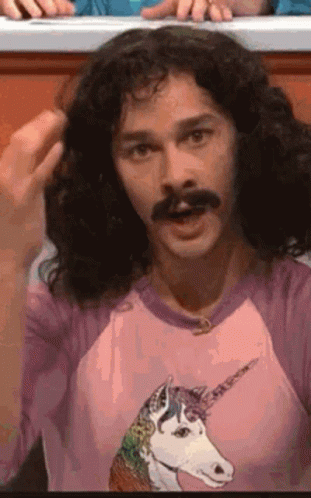

Scatterplot del TSNE:

In [ ]:
#gráfico:
sns.scatterplot(x = X_tsne[:,0], y = X_tsne[:,1], hue = labels, palette = sns.hls_palette(10), legend = 'full');
plt.figure(figsize=(16,10))

#Hierarchical clustering



Puede ser:
* Agglomerative: de abajo a arriba
* Divisive: de arriba a abajo

**Agglomerative**

https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

Mediante este método inicialemente tenemos tantos clusters como filas hay en nuestro dataset (K), a partir de ahí se van agrupando en base a los clústers más cercanos.

In [ ]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

# Lo que vamos a hacer es crear una série de puntos en un plano 2D graficarlos
# y ver como se comporta el algoritmo.

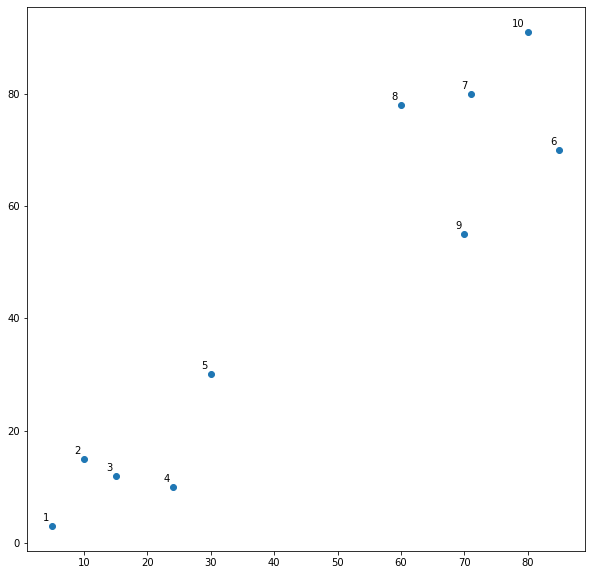

In [ ]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0],X[:,1], label='True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

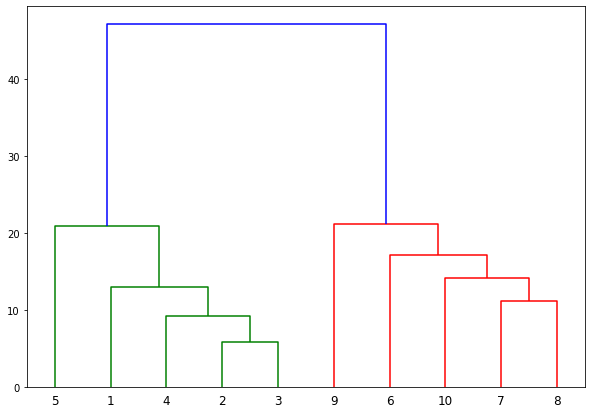

In [ ]:
# @title Grafico Dendogramas
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

¿Cómo se ha llegado a esta solución? En primer lugar se han juntado los dos puntos que están más cerca entre ellos 2 y 3 y de la misma manera 7 y 8, como puede observarse en el primer gráfico. La altura de las barras verticles que unen dos puntos o un punto y un cluster es la distancia euclideana entre estos elementos. Entonces, ¿cuándo definimos o separamos los clusters entre ellos? Cuando la línea vertical supere un umbral mínimo.

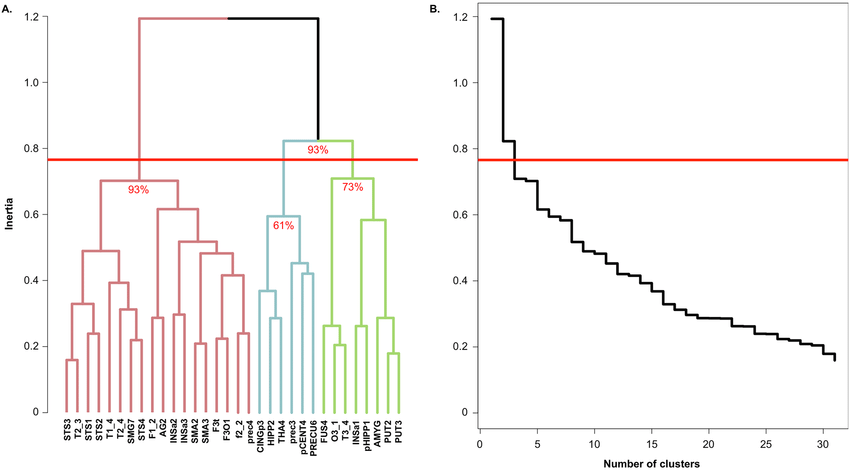

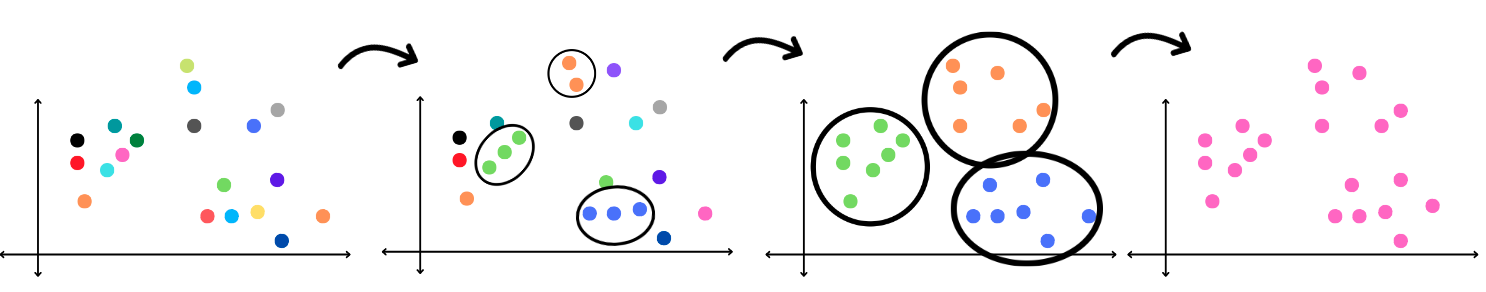

¿Qué distancias podemos tener en cuenta?

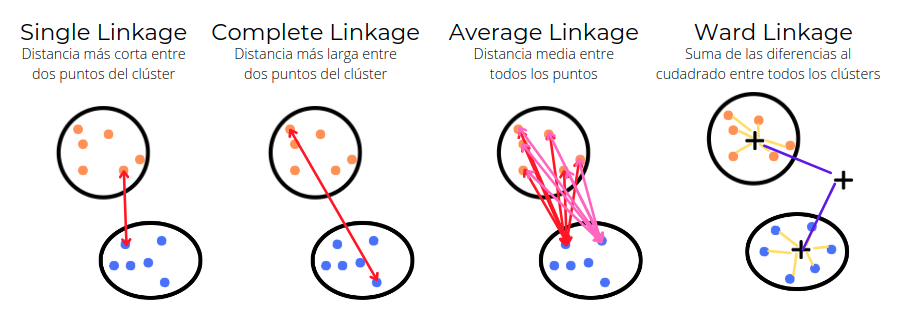

Estos son los tipos de medidas, pero la distancia puede ser:
* Euclideana
* Manhattan

### Ejemplo 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
print(dataset.head())
X = dataset.iloc[:, [3,4]].values # se hará la predicción de los clústers en base a las dos últimas columnas.

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


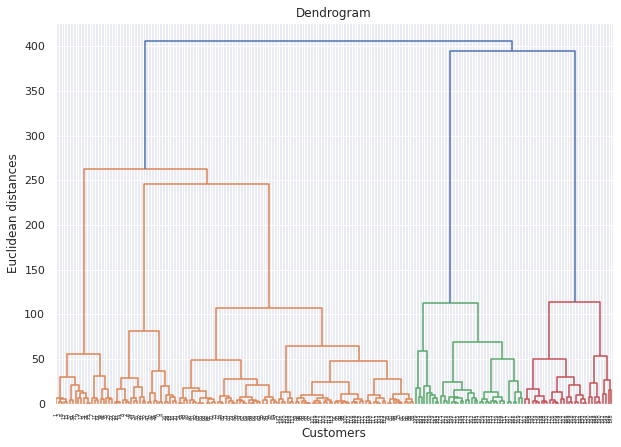

In [ ]:
# Primero lo visualizaremos nosotros usando un dendograma
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# aplicamos el algoritmo
ac = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_ac = ac.fit_predict(X)

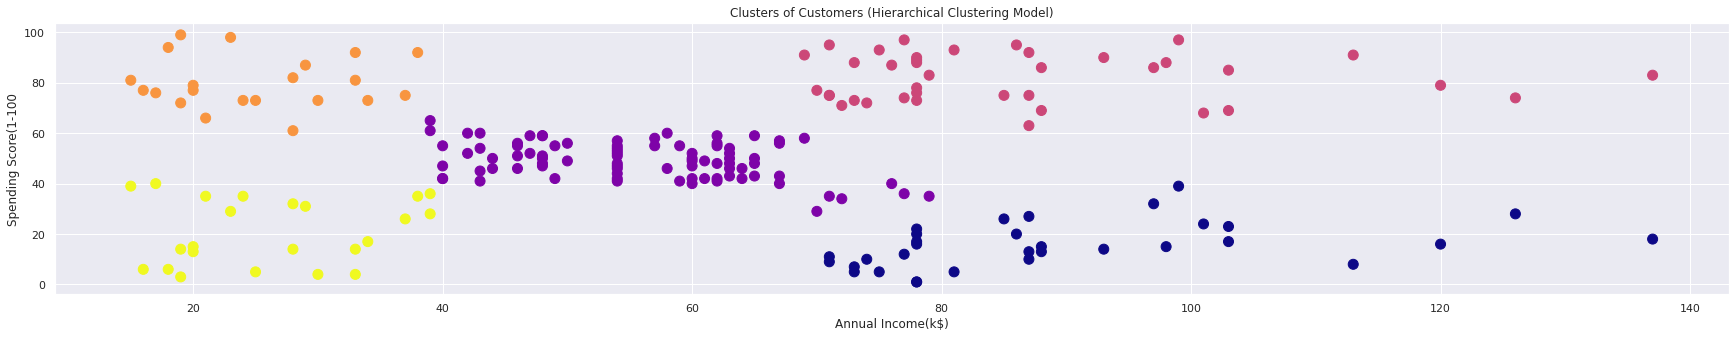

In [ ]:
# representamos los resultados
plt.figure(figsize=(30, 5))
plt.scatter(X[:, 0],X[:,1], s= 100, c = y_ac, cmap="plasma")
# Si queremos etiquetar las categorías
#plt.scatter(X[y_ac==0, 0], X[y_ac==0, 1], s=100, c='red', label ='Cluster 1')
#plt.scatter(X[y_ac==1, 0], X[y_ac==1, 1], s=100, c='blue', label ='Cluster 2')
#plt.scatter(X[y_ac==2, 0], X[y_ac==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(X[y_ac==3, 0], X[y_ac==3, 1], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(X[y_ac==4, 0], X[y_ac==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

**¿Qué pasaría si aplicáramos otro linkage, o si la distancia se midiera mediante otro método?**

#Recuerda!
**¿Qué debemos tener en cuenta a la hora de escoger un tipo de algoritmos u otro?**

Dependerá de los datos que tengamos, por ejempo si la base de datos es muy grande el *Hierarchical clustering* será muy lento, por lo tanto no es una buena elección, por otro lado otra distinición entre los distintos tipos de algoritmos es el hecho de que en unos definimos el número de clústers que queremos *Partitioning clustering* mientras que otros como *DBSCAN* no. Dependiendo del reto al que nos enfrentemos escogeremos un método u otro.


**Debes ser consicente que cada algoritmo actuará de una manera u otra dependiendo de los datos de entrada** puede visualizarse muy claramente con el ejemplo que se encuentra en scikit-learn


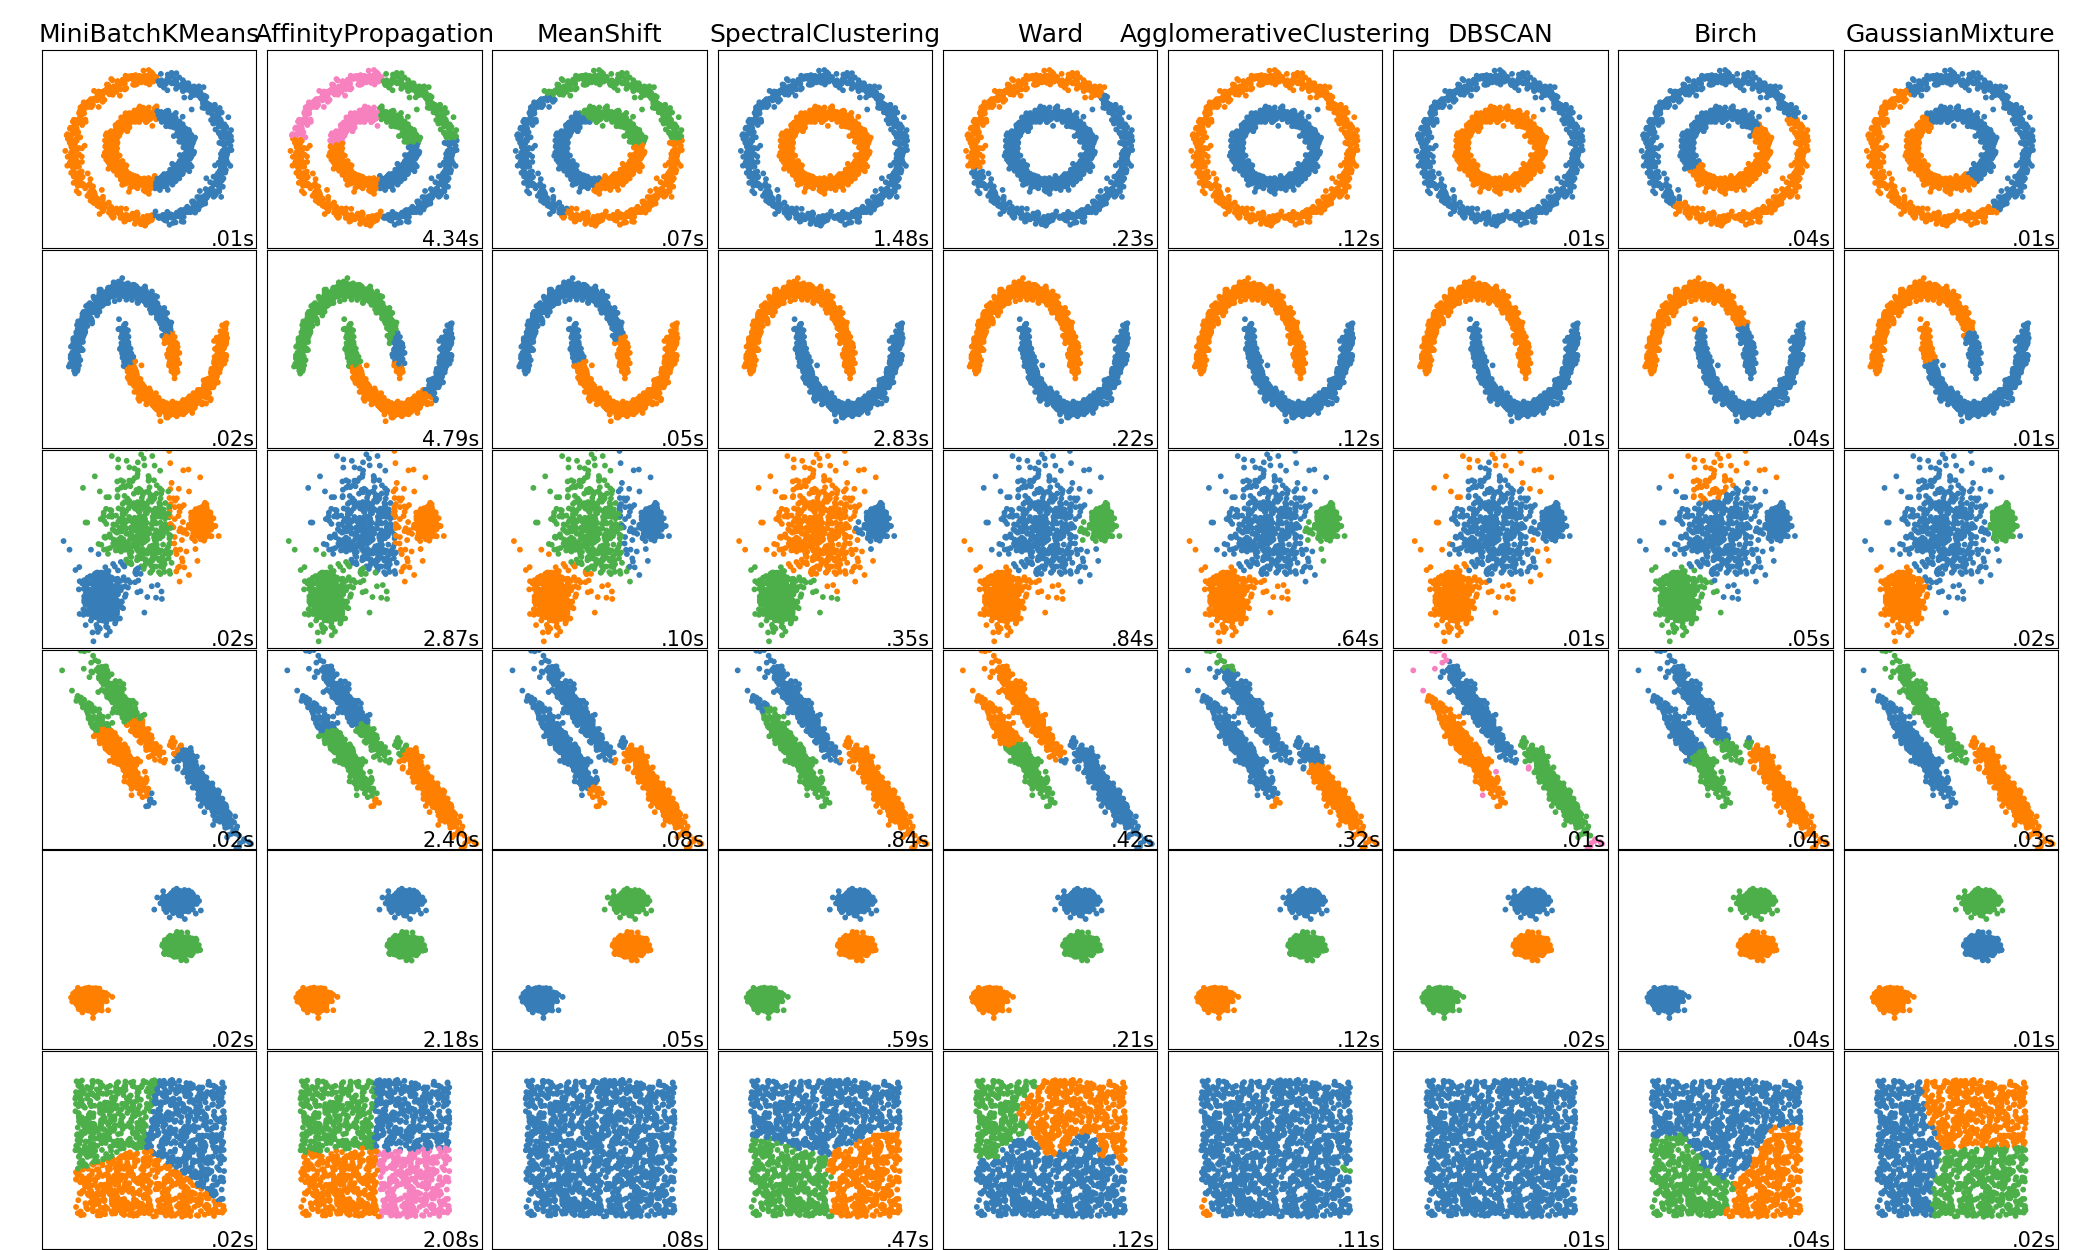

**Otros algoritmos de clustering**:

https://towardsdatascience.com/17-clustering-algorithms-used-in-data-science-mining-49dbfa5bf69a

https://machinelearningmastery.com/clustering-algorithms-with-python/